<a href="https://colab.research.google.com/github/07fathir/Praktikum_AI_Workflow/blob/main/Praktikum_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
# Buat data penjualan toko
data = {
    "Tanggal": ["2025-02-01", "2025-02-02", "2025-02-02", "2025-02-03", "2025-02-04", "2025-02-04", "2025-02-05", "2025-02-05", "2025-02-06", "2025-02-07"],
    "Produk": ["Beras", "Minyak Goreng", "Gula", "Telur", "Minuman","Mie Goreng", "Snack", "Susu", "Kecap", "Roko"],
    "Jumlah Terjual": [10, 7, 18, 9, 29, 15, 14, 11, 8, 20],
    "Stok": [20, 23, 12, 21, 1, 15, 16, 19, 22, 10],
    "Harga Satuan": [12000, 15000, 13000, 11000, 14000, 4000, 2000, 3000, 5000, 28000]
}

# Simpan dalam DataFrame
df = pd.DataFrame(data)

# Simpan sebagai file CSV
df.to_csv("data_penjualan.csv", index=False)



In [46]:
#membaca file CSV
df =pd.read_csv("data_penjualan.csv")

#menampilkan 5 data pertama
print(df)

      Tanggal         Produk  Jumlah Terjual  Stok  Harga Satuan
0  2025-02-01          Beras              10    20         12000
1  2025-02-02  Minyak Goreng               7    23         15000
2  2025-02-02           Gula              18    12         13000
3  2025-02-03          Telur               9    21         11000
4  2025-02-04        Minuman              29     1         14000
5  2025-02-04     Mie Goreng              15    15          4000
6  2025-02-05          Snack              14    16          2000
7  2025-02-05           Susu              11    19          3000
8  2025-02-06          Kecap               8    22          5000
9  2025-02-07           Roko              20    10         28000


In [37]:
#membaca file CSV
df =pd.read_csv("data_penjualan.csv")

#menampilkan 5 data pertama
print(df.head())

      Tanggal         Produk  Jumlah Terjual  Stok  Harga Satuan
0  2025-02-01          Beras              10    20         12000
1  2025-02-02  Minyak Goreng               7    23         15000
2  2025-02-02           Gula              18    12         13000
3  2025-02-03          Telur               9    21         11000
4  2025-02-04        Minuman              29     1         14000


In [38]:
#cek apa ada data yang kosong
print(df.isnull().sum())

#konvers kolom tanggal ke format datetime
df["Tanggal"]=pd.to_datetime(df["Tanggal"])
df["Total Penjualan"]=df["Jumlah Terjual"] *df["Harga Satuan"]
df["Keuntungan"]=df["Total Penjualan"] - (df["Jumlah Terjual"]*10000)

print(df.head())

Tanggal           0
Produk            0
Jumlah Terjual    0
Stok              0
Harga Satuan      0
dtype: int64
     Tanggal         Produk  Jumlah Terjual  Stok  Harga Satuan  \
0 2025-02-01          Beras              10    20         12000   
1 2025-02-02  Minyak Goreng               7    23         15000   
2 2025-02-02           Gula              18    12         13000   
3 2025-02-03          Telur               9    21         11000   
4 2025-02-04        Minuman              29     1         14000   

   Total Penjualan  Keuntungan  
0           120000       20000  
1           105000       35000  
2           234000       54000  
3            99000        9000  
4           406000      116000  


In [39]:
!pip install scikit-learn

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Pilih fitur (x) dan target (y)
x = df[["Jumlah Terjual", "Stok"]]
y = (df["Stok"] < 5).astype(int) # 1 jika stok kurang dari 5, 0 jika cukup

# Split data menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Buat model Decision Tree
model =DecisionTreeClassifier()
model.fit(x_train, y_train)

# Evaluasi model
y_pred =model.predict(x_test)
print("Akurasi Model: ", accuracy_score(y_test, y_pred))

Akurasi Model:  1.0


In [41]:
produk_baru=[[8,3]]
prediksi=model.predict(produk_baru)

if prediksi[0]==1:
  print("produk perlu di restock")
else:
  print("stock cukup")

produk perlu di restock


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


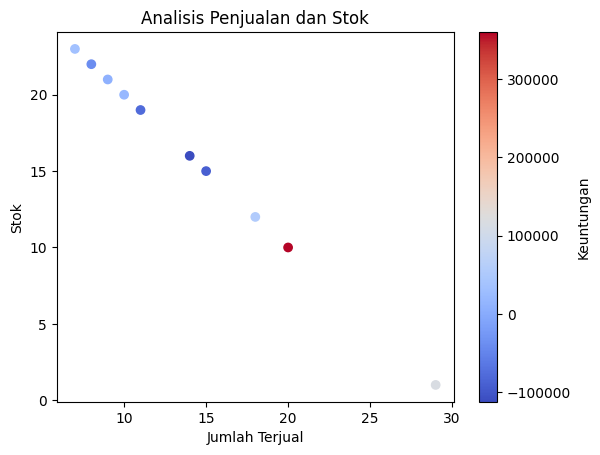

In [42]:
import matplotlib.pyplot as plt
plt.scatter (df["Jumlah Terjual"], df["Stok"], c=df["Keuntungan"], cmap="coolwarm")
plt.xlabel("Jumlah Terjual")
plt.ylabel("Stok")
plt.title("Analisis Penjualan dan Stok")
plt.colorbar (label="Keuntungan")
plt.show()